In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import random

In [3]:
data = pd.read_csv('curated_dataset_6PCs_200.csv')

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

sample_list = sorted(['L1T1', 'L1T2','L1T3', 'L1T4', 'L3T2', 'L3T3', 'L3T4', 'L5T3', 'L5T4', 'L7T4'] * 3)

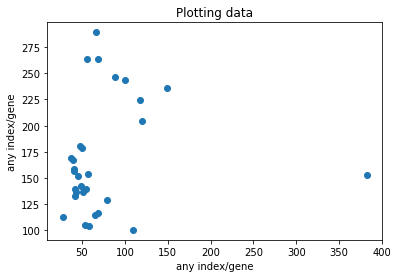

In [4]:
def plotRawData(input_data, x_cor, y_cor):
    """data has to be an array"""
    plt.figure()
    plt.scatter(input_data[:, x_cor], input_data[:, y_cor])
    plt.xlabel('any index/gene')
    plt.ylabel('any index/gene')
    plt.title('Plotting data')
    return plt.show()

plotRawData(X, 4, 5)

In [8]:
def nFakeSamples(n, class1, class2):
    
    test_sample = np.zeros((n, class1.shape[1]))
    
    for j in test_sample:    
        for i in range(class1.shape[1]):
            rand = random.random()
            if rand <= 0.20:
                j[i] = random.uniform(np.amin(class2[:,i]), np.amax(class2[:,i]))
            else:
                j[i] = random.uniform(np.amin(class1[:,i]), np.amax(class1[:,i]))
            
    test_sample = test_sample.reshape(n, -1)
    return test_sample

In [9]:
class_1 = X[[0, 1, 2], :]
class_2 = X[[3 , 4, 5], :]
test_sample = nFakeSamples(2, class_1, class_2)

test_sample_label = []
for i in range(1, len(test_sample) + 1):
    test_sample_label.append('T_S_{}'.format(i))

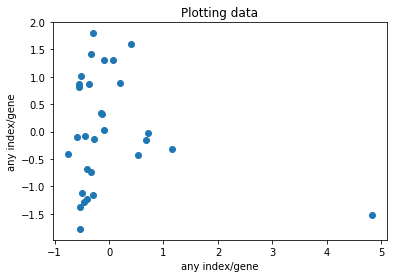

In [10]:
sc = StandardScaler()
scaled_data = sc.fit_transform(X)
scaled_test = sc.transform(test_sample)

train_data, test_data, y_train, y_test = train_test_split(scaled_data, y, test_size = 0)

combined_data = np.append(train_data, scaled_test, axis = 0)

sample_label = []
for i in y_train:
    if i == 0:
        sample_label.append('L1T1')
    elif i == 1:
        sample_label.append('L1T2')
    elif i == 2:
        sample_label.append('L1T3')
    elif i == 3:
        sample_label.append('L1T4')
    elif i == 4:
        sample_label.append('L3T2')
    elif i == 5:
        sample_label.append('L3T3')
    elif i == 6:
        sample_label.append('L3T4')
    elif i == 7:
        sample_label.append('L5T3')
    elif i == 8:
        sample_label.append('L5T4')
    elif i == 9:
        sample_label.append('L7T4')
    
plotRawData(scaled_data, 4, 20)

#### With 10 genes KPCA does not work well, but tsne works great
#### With 20 genes KPCA works well with 3 PCs, but tsne works great
#### With 50 genes KPCA works well with 3 PCs, but tsne works great
#### With 100 genes KPCA works well with 3 PCs, but tsne works great
#### With 200 genes KPCA works well with 3 PCs, but tsne works great

In [11]:
kpca = KernelPCA(n_components = 5, kernel = 'rbf')
kpca_ = kpca.fit_transform(combined_data)
kpca_train = kpca_[:30,:]
kpca_test = kpca_[30:,:]

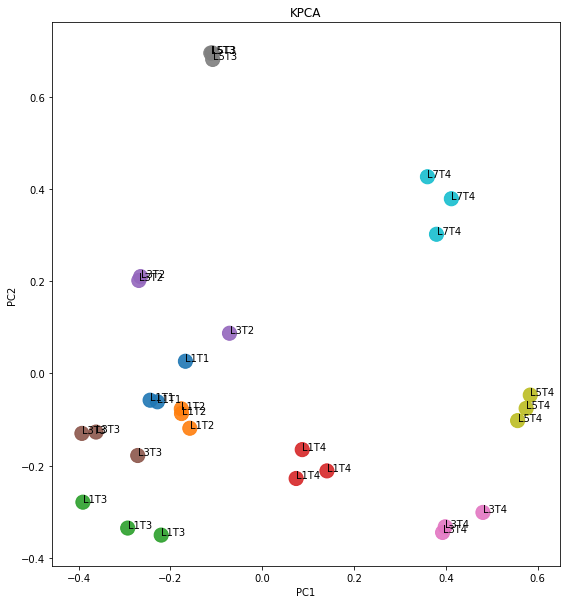

In [12]:
fig = plt.figure(figsize = (20, 10))

ax1 = plt.subplot(1, 2, 1)
plt.scatter(kpca_train[:,0], kpca_train[:,1], c = y_train, s = 200, cmap = 'tab10', alpha = 0.9)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KPCA')
for i, txt in enumerate(sample_label):
    ax1.annotate(txt, (kpca_train[:,0][i], kpca_train[:,1][i]))

plt.show()

In [13]:
tsne = TSNE(n_components = 2, n_iter = 200000, perplexity = 9, init = 'pca')
tsne_ = tsne.fit_transform(combined_data)
tsne_train = tsne_[:30,:]
tsne_test = tsne_[30:,:]

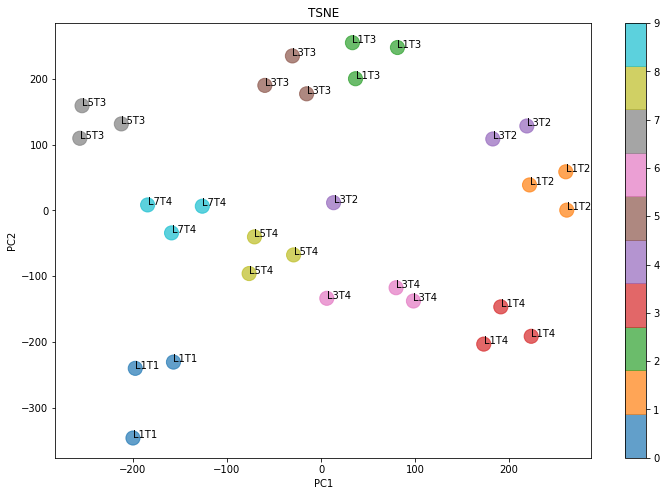

In [15]:
fig, ax = plt.subplots(figsize = (12,8))

plt.scatter(tsne_train[:,0], tsne_train[:,1], c = y_train, s = 200, cmap = 'tab10', alpha = 0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('TSNE')
plt.colorbar()
for i, txt in enumerate(sample_label):
    ax.annotate(txt, (tsne_train[:,0][i], tsne_train[:,1][i]))

plt.show()

In [16]:
def train_test_result(train_data, test_data):
    kmeans = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 300, n_init = 100)
    y_train = kmeans.fit_predict(train_data)
    y_test = kmeans.predict(test_data)
    
    plt.rc('font', size = 10)    
    fig, ax = plt.subplots(figsize = (14,10))
    plt.scatter(train_data[:,0], train_data[:,1], c = y_train, s = 200, cmap = plt.get_cmap('tab10', 10), alpha = 0.7)
    plt.scatter(test_data[:,0], test_data[:,1], c = y_test, s = 200, cmap = plt.get_cmap('tab10', 10), alpha = 0.7)
    
    for i, txt in enumerate(sample_label):
        ax.annotate(txt, (train_data[:,0][i], train_data[:,1][i]))
        
    for j, txt in enumerate(test_sample_label):
        ax.annotate(txt, (test_data[:,0][j], test_data[:,1][j]))
        
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    plt.colorbar(ticks = range(10), label = 'Clusters')
    plt.clim(0,10)
    plt.title('KMeans clustering')
    return y_train, y_test, plt.show()

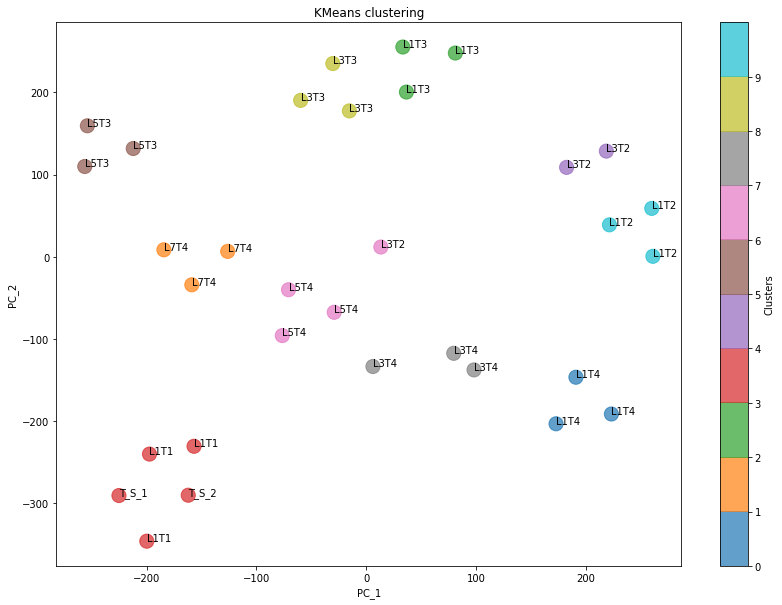

(array([8, 7, 3, 3, 7, 2, 5, 5, 1, 2, 9, 4, 1, 6, 4, 1, 7, 0, 3, 6, 2, 9,
        0, 9, 8, 6, 6, 0, 8, 5]), array([3, 3]), None)

In [17]:
train_test_result(tsne_train, tsne_test)